# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.145440e+01     6.272565e+00
 * time: 0.004990100860595703
     1     2.974360e+01     5.896173e+00
 * time: 0.014812231063842773
     2     2.703326e+01     8.582740e+00
 * time: 0.038781166076660156
     3     1.916410e+01     5.394602e+00
 * time: 0.06737422943115234
     4     1.307265e+01     1.717051e+00
 * time: 0.17227411270141602
     5     1.136740e+01     1.005540e+00
 * time: 0.19508099555969238
     6     1.094601e+01     1.551284e+00
 * time: 0.21317410469055176
     7     1.062295e+01     1.011575e+00
 * time: 0.23140716552734375
     8     1.030644e+01     7.818714e-01
 * time: 0.24958109855651855
     9     1.009486e+01     7.901065e-01
 * time: 0.267902135848999
    10     9.866710e+00     5.942484e-01
 * time: 0.2862100601196289
    11     9.856843e+00     1.337524e+00
 * time: 0.29988622665405273
    12     9.719112e+00     7.404562e-01
 * time: 0.31377100944519043
    13     9.609247e+00     7.794313e-01
 * time:

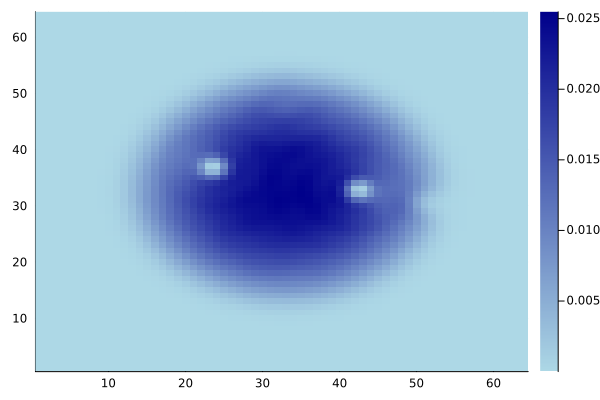

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)